In [2]:
# importer les packages
import pandas as pd
import numpy as np
from google.colab import files

# text preprocessing
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

 
# feature extraction & vectorization
from sklearn.feature_extraction.text import CountVectorizer

# classifiers et data shufling 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit

# plots & metrics
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# pour la visualisation
import seaborn as sns
# pour génerer le model pour le deploiyer sur l'appplication
import pickle


In [4]:
from google.colab import files
files.upload()

Saving dataset.csv to dataset.csv


{'dataset.csv': b'text\tlabel\r\n"Salut !\n\nAlors effectivement c\xe2\x80\x99est un pav\xc3\xa9 mais, je pense que tu en avais besoin. De te confier !\nDans un premier temps, je tiens \xc3\xa0 mettre les choses au clair, pleurer parce que tu t\xe2\x80\x99es fait recaler par cette fille n\xe2\x80\x99a rien d\xe2\x80\x99anormal et m\xc3\xaame si tu n\xe2\x80\x99aurais pas pleurer, tu n\xe2\x80\x99aurais toujours pas \xc3\xa9t\xc3\xa9 anormal, tout simplement parce que la bonne r\xc3\xa9action n\xe2\x80\x99existe pas. Chacun r\xc3\xa9agit en fonction de ce qu\xe2\x80\x99il ressent, et \xc3\xa7a tu ne pourras jamais t\xe2\x80\x99en d\xc3\xa9barrasser. Tu traversais une phase difficile , tu \xc3\xa9tais complexe et cette fille \xc3\xa9tait la seule ( que tu as remarqu\xc3\xa9 ) qui s\xe2\x80\x99int\xc3\xa9ressait \xc3\xa0 toi, c\xe2\x80\x99est normal que tu te sois attach\xc3\xa9 \xc3\xa0 elle, c\xe2\x80\x99est humain tout simplement. Mais en revanche, ce que tu dois imm\xc3\xa9diatement e

In [10]:
df=pd.read_csv("dataset.csv", sep='\t', header=0, index_col=None)
df.head()

text  label
0  Salut !\n\nAlors effectivement c’est un pavé m...   ados
1  Bonjour\nJe ne suis pas maman solo mais qui su...  adult
2  Ho mon dieu il met des " ^^ " D: Je te souhait...   ados
3                             Ouais, je comprends...   ados
4                                    Folle de toi...   ados

## **Nettoyage des données :**
   nos données contiennent beaucoup de bruit, soit sous forme de symboles, soit sous forme de ponctuations et de mots vides. Par conséquent, il devient nécessaire de nettoyer le texte, non seulement pour le rendre plus compréhensible, mais aussi pour obtenir de meilleures informations.
   Je vais effectuer un nettoyage de texte sur les colonnes contenant des données textuelles.



Voyons s'il y a des valeurs nulles présentes dans notre jeu de données :

In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [13]:
df.head(50)

text  label
0   Salut !\n\nAlors effectivement c’est un pavé m...   ados
1   Bonjour\nJe ne suis pas maman solo mais qui su...  adult
2   Ho mon dieu il met des " ^^ " D: Je te souhait...   ados
3                              Ouais, je comprends...   ados
4                                     Folle de toi...   ados
5   Tu parles d'Amour avec un grand À. Tu y crois ...   ados
6   Salut , il faut que tu en parle , si ça te fai...   ados
7   Salut,\nje ne vais pas te dire d'assumer car t...   ados
8   Déjà tu as eu raison de remettre ton neveu à s...  adult
9   ça me rappelle ce post :\n\nhttp://forum.docti...  adult
10  merci pour ta réponse ;-)\nje stresse toujours...  adult
11  Peut-être que, t’attacher à un garçon que tu c...   ados
12  Bonjour,\n\ntout d'abord je ne sais pas si je ...  adult
13  En effet j'aimerais bien voir du monde mais je...   ados
14  Bonsoir à toutes et tous!\n\nJe suis désolée, ...  adult
15  Bonjour,\n\nJe pense m'être mal exprimé, je re...   ados
16  Merci beaucoup pour ce message, j'espère pouvo...   ados
17  Quelle soit triste je le conçois , et de me pe...  adult
18  Bonsoir headhunters ,\n\nEt bien tu n'es plus ...   ados
19  Ils ont parlés de ce mouvement il y a quelques...  adult
20  Je reviens juste là-dessus. Pour aider ton fil...  adult
21  Je pense qu'il faudrait que je lui demande mai...   ados
22  Slt , quels sont vos fantasmes filles et mecs ...   ados
23  mourir dans une soirée mousse\n\nl'horreur du ...   ados
24  En réponse à mam00lb\nBonjour je suis en plein...  adult
25  Bonjour,\n\n\nje suis un maman de 4 beaux garç...  adult
26  Ya pas mal de monde sur GTA en ce moment comme...   ados
27  Salut.. je joux a gta5 ou cal of duty ghost ou...   ados
28  j'ai une niece de 25 ans qui faisait ca aussi ...  adult
29  Sinon autre solution, tu utilise le mode "bat ...   ados
30  Je remarque qu'un bon nombre de personne ici a...  adult
31  Norway. Je crois quje sais ou aller vivre un p...   ados
32  Salut !\nDéjà, je pense qu’on a tous vécu ça à...   ados
33  Remarque c'est pas mal comme de contraception ...  adult
34  salut, j'y suis rentré.... mais j'ai l'impress...   ados
35  ou sinon si tu as une carte vitale je pense qu...   ados
36  bonjour Mon fils ne se plait pas sa classe cet...  adult
37  Mais enfin si à 45 ans tu es incapable de dire...  adult
38  Maman avait les yeux rivés sur bébé.\n\nIl ne ...  adult
39  encore merci pour ta réponse tu m'aides beauco...   ados
40  Alors finalement vous voilà rassuré. Je suis t...  adult
41                 le rire c'est une défense aussi...  adult
42  J'ai jamais fugué, juste des escapades nocturn...   ados
43  Bonjour à tous, j'ai du mal à rencontrer des j...   ados
44  Citation :\nEuh, je me vois mal arriver en soi...  adult
45  Bonsoir,\n\nMerci pour la réponse. Je ne sais ...  adult
46  Citation :\n\n\n\n\nLa grande question serait ...  adult
47  bonjour sylvie,\n J`ai lu la réponse que vous ...  adult
48  Salut je te remercie de ton aide est je suivra...   ados
49  Le baby-blues est un passage très très fréquen...  adult

### Prendre 5OOO lignes de lignes dont le target et "adult" et 5OOO lignes de lignes dont le target et "ados"

In [14]:
df_ados = df.loc[(df['label'] == 'ados')][0:5000]
df_adult = df.loc[(df['label'] == 'adult')][0:5000]
dataset = pd.concat([df_ados, df_adult], axis=0)

In [15]:
dataset

text  label
0     Salut !\n\nAlors effectivement c’est un pavé m...   ados
2     Ho mon dieu il met des " ^^ " D: Je te souhait...   ados
3                                Ouais, je comprends...   ados
4                                       Folle de toi...   ados
5     Tu parles d'Amour avec un grand À. Tu y crois ...   ados
...                                                 ...    ...
9991  Merci pour ta réponse a70edc, ma mère est enti...  adult
9993  En fait à la crèche c'est logique que les pare...  adult
9996  Je suis en plein questionnement en ce moment, ...  adult
9997  J ai trouvé des extraits qui resument plus cla...  adult
9999  bonjour!!! je suis une jeune puisque j'ai moi ...  adult

[10000 rows x 2 columns]

In [16]:
table = [x for x in  range(10000)]
table

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [17]:
dataset['id'] = table

In [18]:
dataset = dataset.set_index('id')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [20]:
dataset['label'].unique()

array(['ados', 'adult'], dtype=object)

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
lemmatizer = WordNetLemmatizer()
corpus1 = []
for i in range(0, len(dataset)):
        
        review1 = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
        review1 = review1.lower()
        review1 = review1.split()
        review1 = [lemmatizer.lemmatize(word) for word in review1 if not word in stopwords.words('french')]
        review1 = ' '.join(review1)
        corpus1.append(review1)

In [25]:
corpus1[2]

'ouais comprends'

In [26]:
len(corpus1)

10000

In [27]:
corpus1

['salut alors effectivement pav pense besoin confier premier temp tiens mettre choses clair pleurer parce fait recaler cette fille a rien anormal si pleurer toujours anormal tout simplement parce bonne r action existe chacun r agit fonction ressent a pourras jamais barrasser traversais phase difficile tai complexe cette fille tait seule remarqu int ressait normal attach humain tout simplement revanche doi imm diatement enlever sans doute plus facile dire faire faut premier temp arr ter comparer situation celle autres jamais pareil jumeaux beau ressembler physiquement mentalement totalement diff rent souhaite dire cerveau fait alors laine tenant avant ressortir fameuse phrase comme quoi doi jamais changer plaire autres vais commencer dire peux vouloir deviner avenir avant celui ci arrive gentil arr piquer job deviens ok souffrent assez traitent escroquer alors si plus cides entrer march a va faire dire finiras retrait an potentiellement futur femme deviendra laide etc a sais strictement

In [28]:
dataset['text'] = pd.DataFrame(corpus1)

## **Analyse exploratoire des données (EDA)**

**La longueur des échantillons dans l'ensemble de données est très importante, car elle peut affecter la façon dont on représente le texte en tant qu'entités pour les modèles ML.**

count    10000.000000
mean        58.759300
std         93.807688
min          0.000000
25%         14.000000
50%         33.000000
75%         73.000000
max       4774.000000
Name: text, dtype: float64


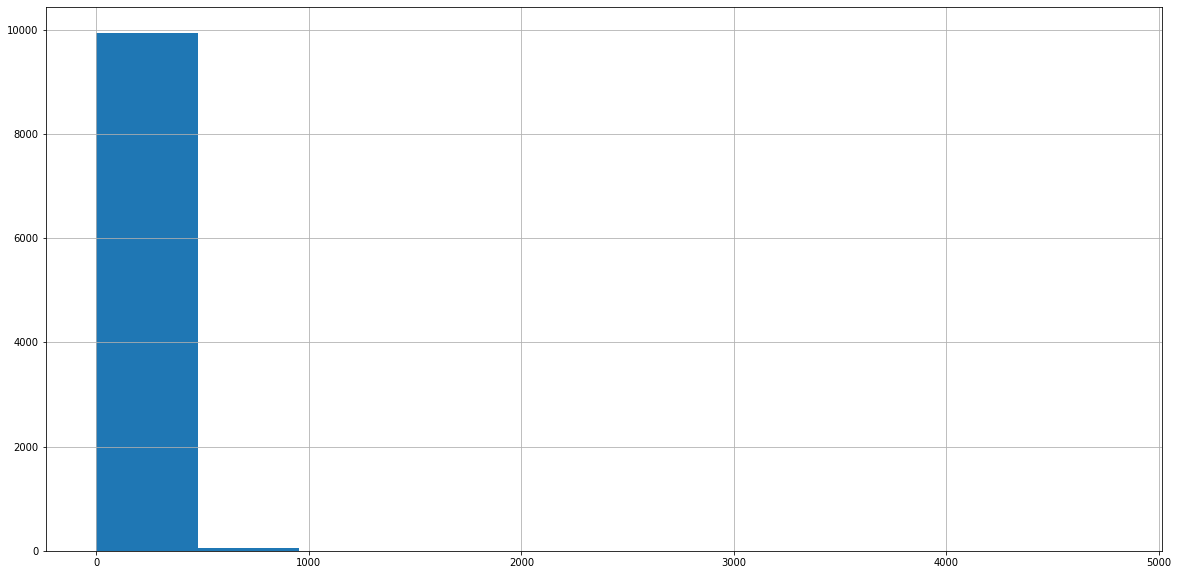

In [29]:
lens = dataset['text'].str.split().apply(lambda x: len(x))
print(lens.describe())
plt.rcParams['figure.figsize'] = [20, 10]
lens.hist()

### **Term frequencies**

**Dans cette étape, je trouve les mots les plus fréquents dans les données, en extrayant des informations sur leur contenu.** 

In [30]:
cv=CountVectorizer()
data=cv.fit_transform(dataset['text'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=dataset.index
df_dtm.head((50))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aaaaaaaaaaaaaaaaaaaa  ...  zxd
id                        ...     
0                      0  ...    0
1                      0  ...    0
2                      0  ...    0
3                      0  ...    0
4                      0  ...    0
5                      0  ...    0
6                      0  ...    0
7                      0  ...    0
8                      0  ...    0
9                      0  ...    0
10                     0  ...    0
11                     0  ...    0
12                     0  ...    0
13                     0  ...    0
14                     0  ...    0
15                     0  ...    0
16                     0  ...    0
17                     0  ...    0
18                     0  ...    0
19                     0  ...    0
20                     0  ...    0
21                     0  ...    0
22                     0  ...    0
23                     0  ...    0
24                     0  ...    0
25                     0  ...    0
26                     0  ...    0
27                     0  ...    0
28                     0  ...    0
29                     0  ...    0
30                     0  ...    0
31                     0  ...    0
32                     0  ...    0
33                     0  ...    0
34                     0  ...    0
35                     0  ...    0
36                     0  ...    0
37                     0  ...    0
38                     0  ...    0
39                     0  ...    0
40                     0  ...    0
41                     0  ...    0
42                     0  ...    0
43                     0  ...    0
44                     0  ...    0
45                     0  ...    0
46                     0  ...    0
47                     0  ...    0
48                     0  ...    0
49                     0  ...    0

[50 rows x 26783 columns]

In [31]:
my_dict = {"mot":[],"frequence":[]};
for column in df_dtm.columns :
  sum = df_dtm[column].sum()
  my_dict["mot"].append(column)
  my_dict["frequence"].append(sum)
   


In [32]:
word_frequence = pd.DataFrame(my_dict)

In [33]:
sorted_word_frequence = word_frequence.sort_values(by='frequence',ascending=False)
sorted_word_frequence.head(50)

mot  frequence
18529      plus       7159
22777        si       6452
20301        re       6367
24945      tout       5573
25211       tre       4868
9506      faire       4771
9521       fait       4645
2753       bien       4485
1121         an       3727
4955      comme       3672
18138      peut       3216
19761     quand       2970
9913      fille       2887
2147      aussi       2747
24972        tr       2746
3658        car       2507
2303      avoir       2491
3433         ca       2307
8389     enfant       2241
18965        pr       2234
21684      rien       2190
7248       dire       2149
17421    parent       2148
7565       donc       2131
3962      cette       2121
22140      sais       2079
7425        dit       2060
24358      temp       2039
18124       peu       1997
26092       vie       1965
24155      tait       1960
968       alors       1922
25694        va       1901
8396    enfants       1868
17870     pense       1836
3840       cela       1753
14609       mal       1717
2217     autres       1711
16409       non       1669
2212      autre       1659
9666       faut       1658
26497  vraiment       1633
26339      voir       1630
24904  toujours       1595
22225      sans       1578
15202     merci       1575
25343      trop       1547
2638   beaucoup       1539
4388      chose       1538
19219     probl       1532

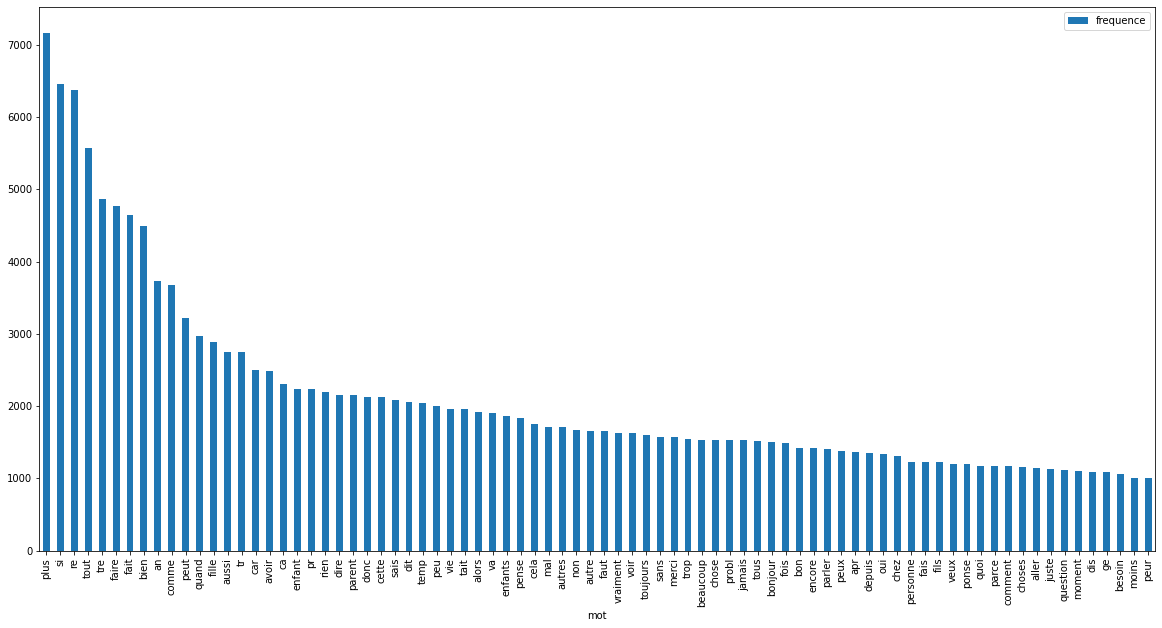

In [34]:
most_frequent_word = sorted_word_frequence.loc[sorted_word_frequence['frequence'] > 1000]
plt.rcParams['figure.figsize'] = [20, 10]
most_frequent_word.plot.bar(x='mot', y='frequence')


**une autre façon de voir les mots les plus fréquents est d'utiliser le nuage de mots**
**Un nuage de mots est une image composée de mots qui, ensemble, ressemblent à une forme nuageuse.**
**La taille d'un mot indique son importance ou sa fréquence d'apparition dans le texte.**

Il y a 3588756 mots dans la combinaison de tous les avis.


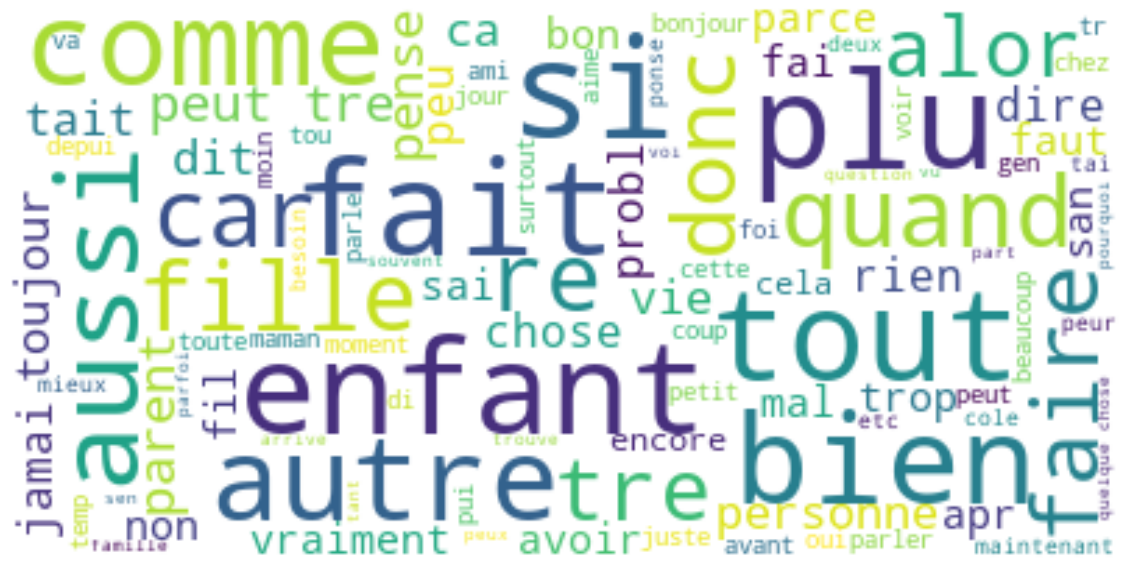

In [35]:
text  = " ".join(review for review in dataset.text)
print ("Il y a {} mots dans la combinaison de tous les avis.".format(len(text)))

# Créez et générez une image de nuage de mots :
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Affichez l'image générée :
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **3 - Machine Learning**

### Comme nous le savons, nous devons représenter nos entités dans un espace vectoriel afin d'utiliser nos modèles. Puisque nos entités sont des textes, nous devrions utiliser une technique d'extraction de caractéristiques pour extraire les vecteurs de caractéristiques. Pour cette démo, nous utiliserons le "bag of words". 

In [36]:
corpus1[1]

'ho dieu met souhaite br ler enfer h r tique oui bon one piece accord chier naruto niveau dessus a casse briques si toute enfance snif ha bah voil tout arrange'

In [37]:
cv = CountVectorizer()
X = cv.fit_transform(corpus1).toarray()

In [38]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
X.shape

(10000, 26783)

In [40]:
target_values={"adult":1,"ados":0}
dataset['label']= dataset['label'].map(target_values)

In [41]:
dataset.head()

text  label
id                                                          
0   salut alors effectivement pav pense besoin con...      0
1   ho dieu met souhaite br ler enfer h r tique ou...      0
2                                     ouais comprends      0
3                                               folle      0
4   parles amour grand crois donc cette drogue rem...      0

In [42]:
y=dataset['label']

In [43]:
y

id
0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: label, Length: 10000, dtype: int64

In [44]:
X = pd.DataFrame(X)

In [45]:
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

for train,test in sss.split(X,y):
    x_train,x_test= X.iloc[train],X.iloc[test]
    y_train,y_test= y.iloc[train],y.iloc[test]

print('x_train taille:' , x_train.shape)
print('x_test taille:' , x_test.shape)
print('y_train taille:' , y_train.shape)
print('y_test taille:' , y_test.shape)

x_train taille: (8000, 26783)
x_test taille: (2000, 26783)
y_train taille: (8000,)
y_test taille: (2000,)


# **Application de Logistic Regression, KNN et DecisionTree algorithms**

In [46]:
models={'LogisticRegression': LogisticRegression(random_state=42),
       'KNeighborsClassifier': KNeighborsClassifier(),
       'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
       }
# La fonction de precision 
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    print(f'La précision du modèle est: {acc}')

#la fonction d'application des modeles

def train_test_eval(models,x_train,y_train,x_test,y_test):
    for name,model in models.items() :
        print(name,':')
        model.fit(x_train,y_train)
        accu(y_test,model.predict(x_test))
        print('-'*30)

train_test_eval(models,x_train,y_train,x_test,y_test)

LogisticRegression :


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


La précision du modèle est: 0.8385
------------------------------
KNeighborsClassifier :
La précision du modèle est: 0.593
------------------------------
DecisionTreeClassifier :
La précision du modèle est: 0.6145
------------------------------


**Comme nous pouvons le voir, logistique regression a la valeur de précision la plus élevée, je vais donc l'utiliser pour faire mes prédictions :**

In [47]:
Classifier=LogisticRegression()
ml = Classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [48]:
#acc = ml.score(x_test, y_test)
pred = ml.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)

accuracy:   0.839


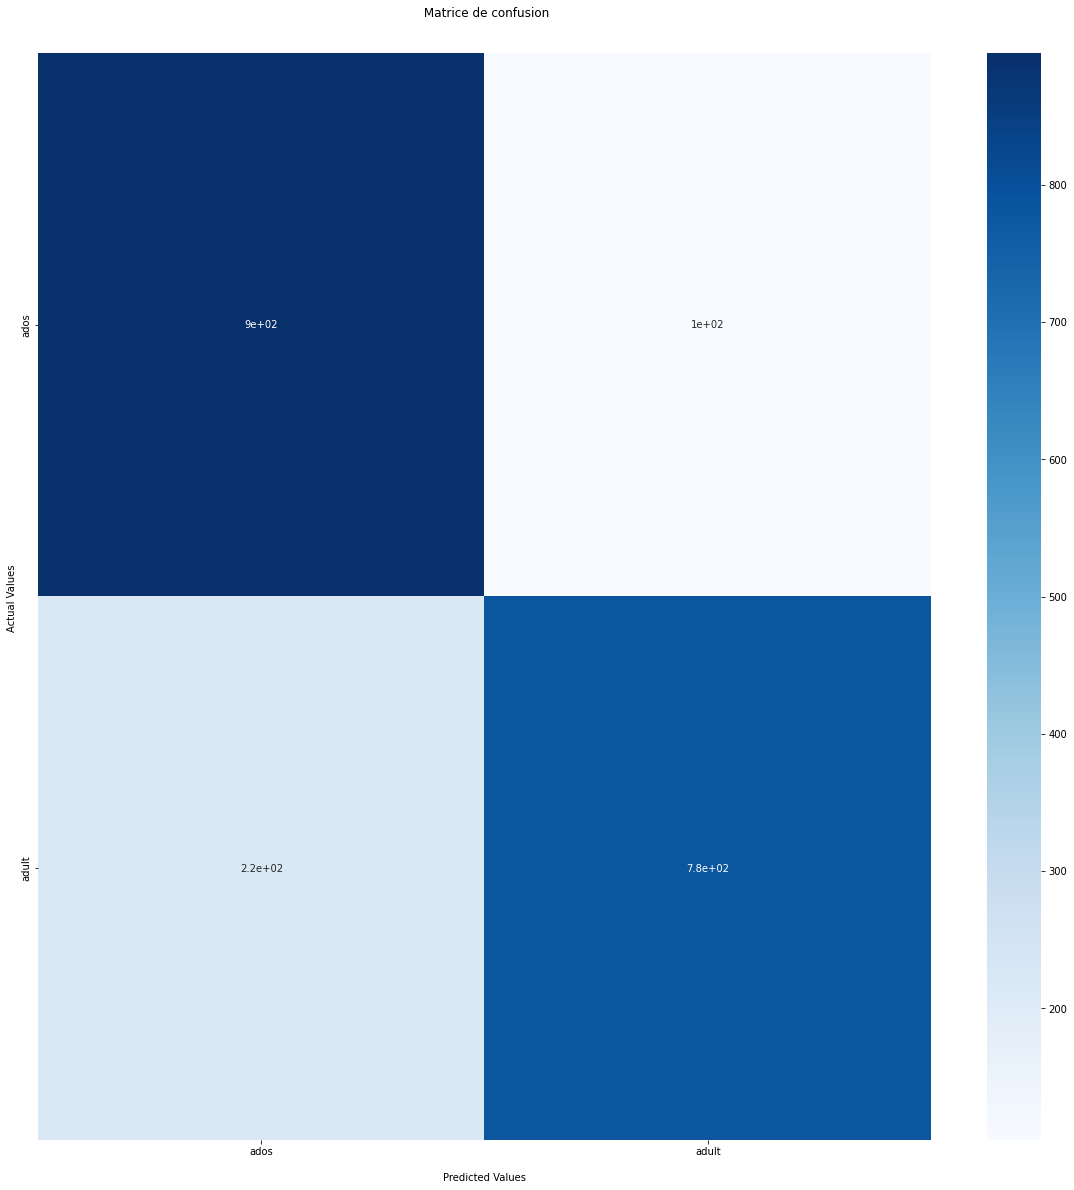

In [49]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Matrice de confusion\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels 
ax.xaxis.set_ticklabels(['ados','adult'])
ax.yaxis.set_ticklabels(['ados','adult'])

## Display the visualization of the Confusion Matrix.
plt.show()



### **Etude comparative des différents résultats obtenus.**

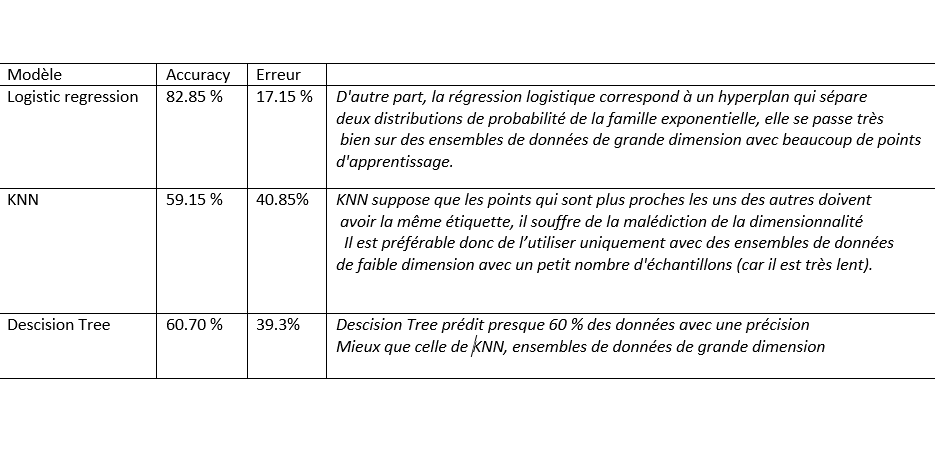

In [ ]:
# Enregistrement de notre modèle
modele = pickle.dump(Classifier,open('model.pkl','wb'))
